In [13]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

# read in the raw data
wine_data = pd.read_csv("C:\Users\User\Desktop\winequality-red.csv", sep=';')

# print the head
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Seperate Target from Training Features**

In [17]:
y = wine_data.quality
X = wine_data.drop('quality', axis=1)

**Split Data into train test sets**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)

**Scale Data**

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train)

**Applying Transformer to Training data**

In [21]:
X_train_scaled = scaler.transform(X_train)
 
print X_train_scaled.mean(axis=0)

[  1.16664562e-16  -3.05550043e-17  -8.47206937e-17  -2.22218213e-17
   2.22218213e-17  -6.38877362e-17  -4.16659149e-18  -2.54439854e-15
  -8.70817622e-16  -4.08325966e-16  -1.17220107e-15]


In [22]:
print X_train_scaled.std(axis=0)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


**Applying Transformer to Test Data**

In [23]:
X_test_scaled = scaler.transform(X_test)
 
print X_test_scaled.mean(axis=0)

[ 0.02776704  0.02592492 -0.03078587 -0.03137977 -0.00471876 -0.04413827
 -0.02414174 -0.00293273 -0.00467444 -0.10894663  0.01043391]


In [24]:
print X_test_scaled.std(axis=0)

[ 1.02160495  1.00135689  0.97456598  0.91099054  0.86716698  0.94193125
  1.03673213  1.03145119  0.95734849  0.83829505  1.0286218 ]


**Pipeline Preprocessing and Model**

In [25]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

**List Hyper Parameters**

In [26]:
print pipeline.get_params()

{'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__min_impurity_split': None, 'standardscaler__copy': True, 'randomforestregressor__oob_score': False, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__min_samples_split': 2, 'memory': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor__random_state': None, 'standardscaler__with_mean': True, 'randomforestregressor__criterion': 'mse', 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, ran

**Declare Hyper Parameters**

In [27]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

**Sklearn Cross Validation with Pipeline**

In [28]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decr...mators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1], 'randomforestregressor__max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**Pring GridSearc Best params**

In [29]:
print clf.best_params_

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto'}


**Confirm model will be Retrained**

In [30]:
print clf.refit

True


**Predict a new set of data**

In [31]:
y_pred = clf.predict(X_test)

In [32]:
print r2_score(y_test, y_pred)

0.454589745142


In [33]:
print mean_squared_error(y_test, y_pred)

0.35193875


**Save Model for Later, PK File**

In [34]:
joblib.dump(clf, 'rf_regressor.pkl')

['rf_regressor.pkl']

***Second pass ***

In [36]:

%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.model_selection
#import sklearn.cross_validation

In [38]:
# read in the raw data
df = pd.read_csv("C:\Users\User\Desktop\winequality-red.csv", sep=';')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Seperate dataset into feature matrix X and Response Vector y**

In [39]:
X_df = df.iloc[:,:-1]
X_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [40]:
X = X_df.as_matrix()
print(X[:3])

[[  7.40000000e+00   7.00000000e-01   0.00000000e+00   1.90000000e+00
    7.60000000e-02   1.10000000e+01   3.40000000e+01   9.97800000e-01
    3.51000000e+00   5.60000000e-01   9.40000000e+00]
 [  7.80000000e+00   8.80000000e-01   0.00000000e+00   2.60000000e+00
    9.80000000e-02   2.50000000e+01   6.70000000e+01   9.96800000e-01
    3.20000000e+00   6.80000000e-01   9.80000000e+00]
 [  7.80000000e+00   7.60000000e-01   4.00000000e-02   2.30000000e+00
    9.20000000e-02   1.50000000e+01   5.40000000e+01   9.97000000e-01
    3.26000000e+00   6.50000000e-01   9.80000000e+00]]


In [41]:
y_df = df["quality"].values
print(y_df[:10])

[5 5 5 6 5 5 5 7 7 5]


__Data Preview__

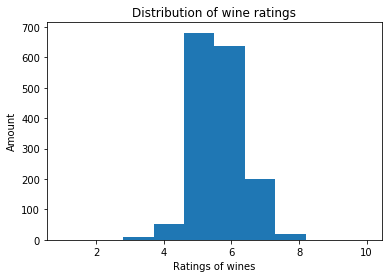

In [42]:

plt.hist(y_df, range=(1, 10))

plt.xlabel('Ratings of wines')
plt.ylabel('Amount')
plt.title('Distribution of wine ratings')
plt.show()

**1~10 Ratings to Binary Classification**
Simplify the classification problem into a binary one: good/bad

Score < 7: bad(0); score >= 7: good(1).

In [43]:
# sklearn can only deal with numpy arrys
y = np.array([1 if i>=7 else 0 for i in y_df])
print(y[:10])

[0 0 0 0 0 0 0 1 1 0]


**Random Forest Classifier Construction**

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

**Parameter Tuning**

In [45]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10))

In [46]:

print(scores[0])
print(scores[1])

[ 0.83229814  0.85714286  0.75625     0.83125     0.88125     0.8125
  0.79375     0.78616352  0.78616352  0.79874214]
[ 0.88819876  0.86956522  0.8375      0.85        0.8875      0.825
  0.85625     0.87421384  0.83647799  0.87421384]


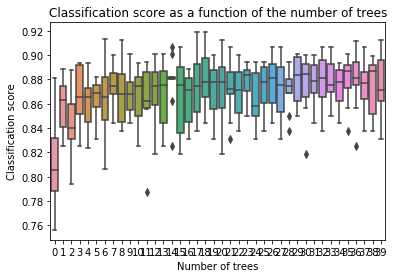

In [47]:

sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('Classification score')
plt.title('Classification score as a function of the number of trees')
plt.show()

**Unbalanced classification Evolution**

In [48]:
good_ratio = sum(y) / len(y)
bad_ratio = 1 - good_ratio
print('Ratio of good wine: ', good_ratio)
print('Ratio of bad wine: ', bad_ratio)

('Ratio of good wine: ', 0)
('Ratio of bad wine: ', 1)


In [49]:
scores = []

for num_trees in range(1,41):
    clf = RandomForestClassifier(n_estimators = num_trees)
    scores.append(cross_val_score(clf, X, y, cv=10, scoring='f1'))

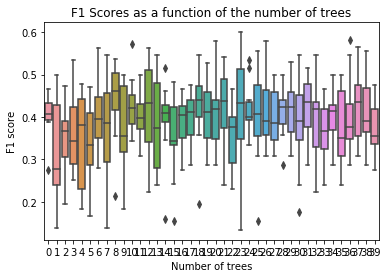

In [50]:
sns.boxplot(data=scores)
plt.xlabel('Number of trees')
plt.ylabel('F1 score')
plt.title('F1 Scores as a function of the number of trees')
plt.show()

In [51]:

clf = RandomForestClassifier(n_estimators = 15)
f1_score = cross_val_score(clf, X, y, cv=10, scoring='f1')
print(f1_score.mean())

0.399464886965


**compute the predicted probabilities**

In [52]:

clf = RandomForestClassifier(n_estimators = 15)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:

print(clf.predict(X)[:10])

[0 0 0 0 0 0 0 1 1 0]


In [54]:

print(clf.predict_proba(X)[:10])

[[ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.13333333  0.86666667]
 [ 0.46666667  0.53333333]
 [ 0.93333333  0.06666667]]


In [55]:

prediction = clf.predict(X)
prediction_from_proba = (clf.predict_proba(X)[:,1]>0.5).astype(int)

In [56]:
correct = [1 if prediction_from_proba[i]== prediction[i] else 0 for i in range(len(prediction))]
print(sum(correct)/len(correct))

1


In [57]:

prediction_from_proba = (clf.predict_proba(X)[:,1]>0.8).astype(int)
correct = [1 if prediction_from_proba[i]== prediction[i] else 0 for i in range(len(prediction))]
print(sum(correct)/len(correct))

0


In [58]:

prediction_from_proba = (clf.predict_proba(X)[:,1]>0.1).astype(int)
correct = [1 if prediction_from_proba[i]== prediction[i] else 0 for i in range(len(prediction))]
print(sum(correct)/len(correct))

0


**Probability Calibration function**

In [59]:
"""
cutoff_predict(clf, X, cutoff)

Inputs:
clf: a **trained** classifier object
X: a 2D numpy array of features
cutoff: a float giving the cutoff value used to convert
        predicted probabilities into a 0/1 prediction.

Output:
a numpy array of 0/1 predictions.
"""

def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)

In [60]:
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

In [61]:

scores = []

for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators = 15)
    score_list = cross_val_score(clf, X, y, cv=10, scoring=custom_f1(cutoff))   
    scores.append(score_list)

C:\ab\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


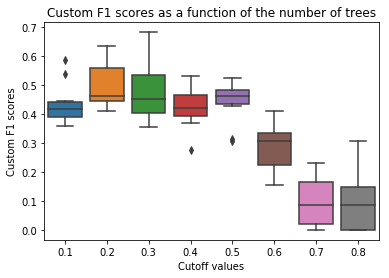

In [62]:
sns.boxplot(x=np.arange(0.1,0.9,0.1), y=scores)
plt.xlabel('Cutoff values')
plt.ylabel('Custom F1 scores')
plt.title('Custom F1 scores as a function of the number of trees')
plt.show()

**Random Forest Classifier**

In [64]:

clf = RandomForestClassifier(n_estimators=15)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
importance_list = clf.feature_importances_
print(importance_list)

[ 0.07116032  0.10774001  0.0929591   0.0677109   0.07270429  0.05029522
  0.09125271  0.098776    0.05410845  0.12699297  0.16630002]


In [66]:
name_list = df.columns[:-1]
# Sort by the importance
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
y_pos = np.arange(len(name_list))

print(name_list)
print(y_pos)

('free sulfur dioxide', 'pH', 'residual sugar', 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'citric acid', 'density', 'volatile acidity', 'sulphates', 'alcohol')
[ 0  1  2  3  4  5  6  7  8  9 10]


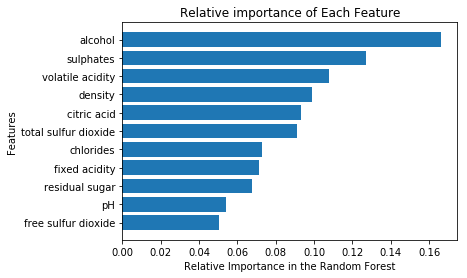

In [67]:
plt.barh(y_pos,importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)

plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [68]:
# Most important
important_list_1 = clf.feature_importances_
col1_index = list(important_list_1).index(max(important_list_1))
# Second most important
col2_index = list(important_list_1).index(sorted(clf.feature_importances_)[-2])

print(col1_index)
print(col2_index)

10
9


In [69]:
X_imp = X[:,[col1_index, col2_index]]
print(X_imp)

[[  9.4    0.56]
 [  9.8    0.68]
 [  9.8    0.65]
 ..., 
 [ 11.     0.75]
 [ 10.2    0.71]
 [ 11.     0.66]]


In [70]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()

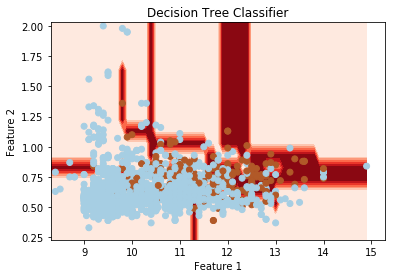

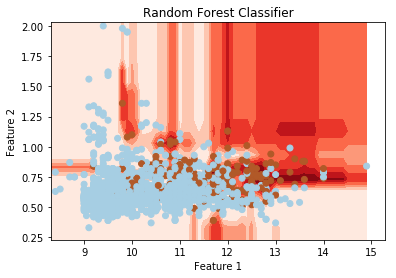

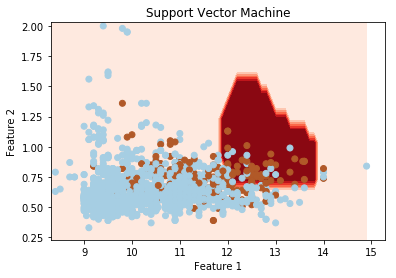

In [71]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=15),
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'Support Vector Machine']
for c in range(3):
    plt.title(titleClassifer[c])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plot_decision_surface(classifiers[c], X_imp, y)